In [1]:
import tensorflow as tf

In [ ]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


<Figure size 1000x1200 with 0 Axes>

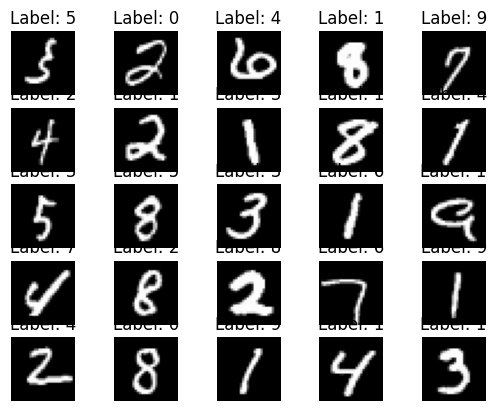

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Select 5 random images from the training set
images = x_train[np.random.randint(0, len(x_train), size=25)]

# Create a 5x5 grid of subplots
plt.figure(figsize=(10, 12))
fig, axes = plt.subplots(5, 5)

# Iterate through the images and labels, and plot each image with its corresponding label
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')

# Display the plot
plt.show()

In [2]:
! pip install tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 11.6 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.1
    Uninstalling typeguard-4.4.1:
      Successfully uninstalled typeguard-4.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.4.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa

In [ ]:
from utils import CustomViT as myViT

In [ ]:
vit_model = myViT(
    num_classes=10,
    input_shape=(28, 28, 1),
    num_heads=8,
    image_size=12,
    patch_size=4,
    transformer_layers=8,
    num_epochs=30
)

In [ ]:
model = vit_model.create_vit_classifier()

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
%%time

with tf.device('/device:GPU:0'):
    history = vit_model.run_experiment(model, x_train, y_train, x_test, y_test)

Epoch 1/30
211/211 [==============================] - 27s 60ms/step - loss: 1.2322 - accuracy: 0.5791 - top-5-accuracy: 0.8981 - val_loss: 0.4628 - val_accuracy: 0.8520 - val_top-5-accuracy: 0.9940
Epoch 2/30
211/211 [==============================] - 11s 53ms/step - loss: 0.5396 - accuracy: 0.8252 - top-5-accuracy: 0.9908 - val_loss: 0.2593 - val_accuracy: 0.9168 - val_top-5-accuracy: 0.9970
Epoch 3/30
211/211 [==============================] - 11s 52ms/step - loss: 0.4178 - accuracy: 0.8674 - top-5-accuracy: 0.9939 - val_loss: 0.2068 - val_accuracy: 0.9340 - val_top-5-accuracy: 0.9978
Epoch 4/30
211/211 [==============================] - 11s 52ms/step - loss: 0.3659 - accuracy: 0.8868 - top-5-accuracy: 0.9951 - val_loss: 0.1956 - val_accuracy: 0.9355 - val_top-5-accuracy: 0.9978
Epoch 5/30
211/211 [==============================] - 12s 57ms/step - loss: 0.3335 - accuracy: 0.8967 - top-5-accuracy: 0.9956 - val_loss: 0.1647 - val_accuracy: 0.9500 - val_top-5-accuracy: 0.9980
Epoch 6/30

Use `wyn-keras` package

In [4]:
! pip install wyn-keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 103.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 97.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 108.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: keras
    Found existing installation: keras

Load `mnist`

In [2]:
import tensorflow as tf
from wyn_keras.vit import ViT

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train[..., tf.newaxis].astype("float32") / 255.0
x_test = x_test[..., tf.newaxis].astype("float32") / 255.0

# Number of classes in MNIST dataset
num_classes = 10

Model fitting and performance

Epoch 1/10
211/211 [==============================] - 27s 74ms/step - loss: 0.7956 - accuracy: 0.7392 - top-5-accuracy: 0.9649 - val_loss: 0.1917 - val_accuracy: 0.9392 - val_top-5-accuracy: 0.9975
Epoch 2/10
211/211 [==============================] - 15s 70ms/step - loss: 0.3558 - accuracy: 0.8873 - top-5-accuracy: 0.9955 - val_loss: 0.1355 - val_accuracy: 0.9585 - val_top-5-accuracy: 0.9973
Epoch 3/10
211/211 [==============================] - 14s 69ms/step - loss: 0.2728 - accuracy: 0.9144 - top-5-accuracy: 0.9968 - val_loss: 0.1143 - val_accuracy: 0.9655 - val_top-5-accuracy: 0.9980
Epoch 4/10
211/211 [==============================] - 15s 70ms/step - loss: 0.2284 - accuracy: 0.9296 - top-5-accuracy: 0.9975 - val_loss: 0.0942 - val_accuracy: 0.9722 - val_top-5-accuracy: 0.9985
Epoch 5/10
211/211 [==============================] - 15s 72ms/step - loss: 0.1954 - accuracy: 0.9400 - top-5-accuracy: 0.9982 - val_loss: 0.0874 - val_accuracy: 0.9735 - val_top-5-accuracy: 0.9990
Epoch 6/10

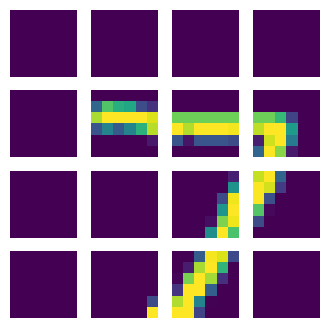

In [3]:
# Create an instance of the ViT class
vit_model = ViT(num_classes=num_classes, input_shape=(28, 28, 1), image_size=28, num_epochs=10)

# Create the ViT model
model = vit_model.create_vit_classifier()

# Train the model
history = vit_model.run_experiment(model, x_train, y_train, x_test, y_test)

# Plot patches
vit_model.plot_patches(x_test)

Load `cifar10`

In [5]:
import tensorflow as tf
from typing import Tuple
import numpy as np

def load_cifar10() -> Tuple[Tuple[np.ndarray, np.ndarray], Tuple[np.ndarray, np.ndarray]]:
    """
    Load and preprocess the CIFAR-10 dataset.

    This function downloads the CIFAR-10 dataset via tf.keras.datasets,
    normalizes the pixel values, and returns the training and testing sets.

    Returns:
        A tuple containing two tuples:
            (x_train, y_train), (x_test, y_test)
        where x_train and x_test are the normalized image data (float32),
        and y_train and y_test are the corresponding labels.
    """
    # Load the dataset from tf.keras.datasets.cifar10
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

    # Convert to float32 and normalize pixel values to the [0, 1] range
    x_train = x_train.astype("float32") / 255.0
    x_test = x_test.astype("float32") / 255.0

    return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = load_cifar10()

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

170498071/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [6]:
num_classes = np.unique(y_train).shape[0]
print(num_classes)

10


Epoch 1/100
176/176 [==============================] - 46s 195ms/step - loss: 2.4598 - accuracy: 0.1234 - top-5-accuracy: 0.5566 - val_loss: 2.0554 - val_accuracy: 0.1992 - val_top-5-accuracy: 0.7710
Epoch 2/100
176/176 [==============================] - 33s 188ms/step - loss: 2.0151 - accuracy: 0.2251 - top-5-accuracy: 0.7828 - val_loss: 1.8659 - val_accuracy: 0.3010 - val_top-5-accuracy: 0.8332
Epoch 3/100
176/176 [==============================] - 32s 185ms/step - loss: 1.8403 - accuracy: 0.3024 - top-5-accuracy: 0.8378 - val_loss: 1.7184 - val_accuracy: 0.3522 - val_top-5-accuracy: 0.8696
Epoch 4/100
176/176 [==============================] - 33s 186ms/step - loss: 1.7344 - accuracy: 0.3494 - top-5-accuracy: 0.8669 - val_loss: 1.6312 - val_accuracy: 0.3936 - val_top-5-accuracy: 0.8956
Epoch 5/100
176/176 [==============================] - 32s 184ms/step - loss: 1.6492 - accuracy: 0.3960 - top-5-accuracy: 0.8836 - val_loss: 1.5322 - val_accuracy: 0.4494 - val_top-5-accuracy: 0.9144


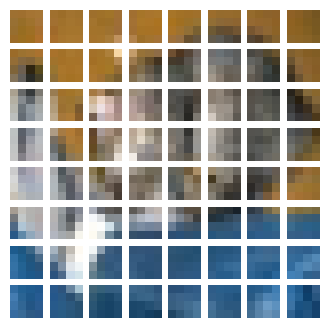

In [8]:
# Create an instance of the ViT class
num_classes = np.unique(y_train).shape[0]
vit_model = ViT(num_classes=num_classes, input_shape=(32, 32, 3), image_size=32, patch_size=4, num_epochs=100)

# Create the ViT model
model = vit_model.create_vit_classifier()

# Train the model
history = vit_model.run_experiment(model, x_train, y_train, x_test, y_test)

# Plot patches
vit_model.plot_patches(x_test)

Epoch 1/1000
176/176 [==============================] - 46s 198ms/step - loss: 2.3932 - accuracy: 0.1551 - top-5-accuracy: 0.6448 - val_loss: 1.9664 - val_accuracy: 0.2442 - val_top-5-accuracy: 0.8012
Epoch 2/1000
176/176 [==============================] - 33s 187ms/step - loss: 1.9393 - accuracy: 0.2635 - top-5-accuracy: 0.8081 - val_loss: 1.7665 - val_accuracy: 0.3372 - val_top-5-accuracy: 0.8670
Epoch 3/1000
176/176 [==============================] - 33s 185ms/step - loss: 1.7859 - accuracy: 0.3302 - top-5-accuracy: 0.8550 - val_loss: 1.6168 - val_accuracy: 0.3890 - val_top-5-accuracy: 0.9008
Epoch 4/1000
176/176 [==============================] - 33s 186ms/step - loss: 1.7007 - accuracy: 0.3620 - top-5-accuracy: 0.8753 - val_loss: 1.5680 - val_accuracy: 0.4198 - val_top-5-accuracy: 0.9032
Epoch 5/1000
176/176 [==============================] - 33s 188ms/step - loss: 1.6099 - accuracy: 0.4134 - top-5-accuracy: 0.8924 - val_loss: 1.4542 - val_accuracy: 0.4886 - val_top-5-accuracy: 0.

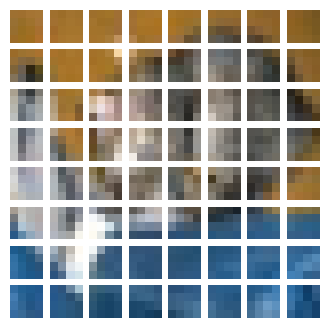

In [9]:
# Create an instance of the ViT class
num_classes = np.unique(y_train).shape[0]
vit_model = ViT(num_classes=num_classes, input_shape=(32, 32, 3), image_size=32, patch_size=4, num_epochs=1000)

# Create the ViT model
model = vit_model.create_vit_classifier()

# Train the model
history = vit_model.run_experiment(model, x_train, y_train, x_test, y_test)

# Plot patches
vit_model.plot_patches(x_test)

Epoch 1/1000
176/176 [==============================] - 27s 82ms/step - loss: 2.2341 - accuracy: 0.1724 - top-5-accuracy: 0.6664 - val_loss: 1.9423 - val_accuracy: 0.2718 - val_top-5-accuracy: 0.8056
Epoch 2/1000
176/176 [==============================] - 13s 72ms/step - loss: 1.9063 - accuracy: 0.2891 - top-5-accuracy: 0.8194 - val_loss: 1.6891 - val_accuracy: 0.3728 - val_top-5-accuracy: 0.8762
Epoch 3/1000
176/176 [==============================] - 12s 70ms/step - loss: 1.7147 - accuracy: 0.3760 - top-5-accuracy: 0.8709 - val_loss: 1.5436 - val_accuracy: 0.4416 - val_top-5-accuracy: 0.9084
Epoch 4/1000
176/176 [==============================] - 13s 72ms/step - loss: 1.6101 - accuracy: 0.4164 - top-5-accuracy: 0.8951 - val_loss: 1.4356 - val_accuracy: 0.4744 - val_top-5-accuracy: 0.9246
Epoch 5/1000
176/176 [==============================] - 12s 70ms/step - loss: 1.5259 - accuracy: 0.4509 - top-5-accuracy: 0.9076 - val_loss: 1.3680 - val_accuracy: 0.5096 - val_top-5-accuracy: 0.9386


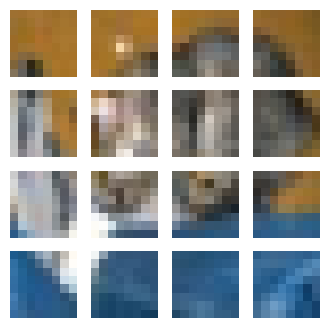

In [10]:
# Create an instance of the ViT class
num_classes = np.unique(y_train).shape[0]
vit_model = ViT(num_classes=num_classes, input_shape=(32, 32, 3), image_size=32, patch_size=8, num_epochs=1000)

# Create the ViT model
model = vit_model.create_vit_classifier()

# Train the model
history = vit_model.run_experiment(model, x_train, y_train, x_test, y_test)

# Plot patches
vit_model.plot_patches(x_test)